In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### 1. format classified and not classfied dimer frequencies table

In [23]:
# classified

cfile = '../tome1.0_paper_data/AA_Dip_OGT_strain_classified.csv'

# not classified
nfile = '../tome1.0_paper_data/Not_classified_With_org_name_After_filter.csv'

# manually checked from literatures for those ones in not classified
expfile = '../tome1.0_paper_data/selected_for_literature_verification_processed_with_OGT_data.tsv'

In [24]:
def clean_index(ind):
    # ind = '37_allobaculum_stercoricanis_bacteria'
    # out = 'allobaculum_stercoricanis'
    out = ''
    for item in ind.split('_')[1:-1]: out += '{0}_'.format(item)
    return out[:-1]

In [25]:
def get_dimers():
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    print(len(amino_acids))
    dimers = []
    for a1 in amino_acids:
        for a2 in amino_acids: dimers.append(a1+a2)
    return dimers

In [26]:
# classified data
dfc = pd.read_csv(cfile,index_col=0)

# remove ogt and domain name
dfc.index = [clean_index(ind) for ind in dfc.index]

# keep only dimers and ogt
features = get_dimers() + ['ogt']
dfc = dfc.loc[:,features]
print(dfc.shape)

20
(5533, 401)


In [27]:
# not classified
dfn = pd.read_csv(nfile,index_col=0)

# add ogt column
dfn['ogt'] = [np.nan for ind in dfn.index]

# update ogt with experimental data
df_exp = pd.read_csv(expfile,index_col=0,sep='\t')
for ind in df_exp.index: dfn.loc[ind,'ogt'] = df_exp.loc[ind,'growth_temperature']

# update index by removing domain names
'','',''
dfn.index = [ind.replace('_archaea','').replace('_bacteria','').replace('_eukaryotes','') for ind in dfn.index]

# keep only dimer and ogt
features = get_dimers() + ['ogt']
dfn = dfn.loc[:,features]
print(dfn.shape)

20
(1438, 401)


#### 2. combine two feature sets as one

In [28]:
df = dfc.append(dfn)

In [29]:
df.shape

(6971, 401)

In [30]:
df.to_csv('../tome1.0_paper_data/data_from_tome1.0_combined.csv')

#### 3. update with martin's data

In [10]:
dfmartin = pd.read_csv('../data/condensed_species_NCBI.csv',index_col=1)
print(dfmartin.shape)
dfmartin.head(5)

(14802, 77)


,species_tax_id,genus,family,order,class,phylum,superkingdom,gram_stain,metabolism,sporulation,...,coding_genes.stdev,optimum_tmp.stdev,optimum_ph.stdev,growth_tmp.stdev,rRNA16S_genes.stdev,tRNA_genes.stdev,data_source,ref_id,intracellular,phototroph
species,,,,,,,,,,,,,,,,,,,,,
Acidipropionibacterium damnosum,1243001,Acidipropionibacterium,Propionibacteriaceae,Propionibacteriales,Actinobacteria,Actinobacteria,Bacteria,NaN,microaerophilic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,1,NaN,NaN
Apibacter adventoris,1679466,Apibacter,Flavobacteriaceae,Flavobacteriales,Flavobacteriia,Bacteroidetes,Bacteria,NaN,microaerophilic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,1,NaN,NaN
Aquaspirillum soli,1591092,Aquaspirillum,Chromobacteriaceae,Neisseriales,Betaproteobacteria,Proteobacteria,Bacteria,NaN,microaerophilic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,1,NaN,NaN
Arcobacter lekithochrous,1904463,Arcobacter,Campylobacteraceae,Campylobacterales,Epsilonproteobacteria,Proteobacteria,Bacteria,NaN,microaerophilic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,1,NaN,NaN
Arcobacter porcinus,1935204,Arcobacter,Campylobacteraceae,Campylobacterales,Epsilonproteobacteria,Proteobacteria,Bacteria,NaN,microaerophilic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,1,NaN,NaN


In [18]:
new_from_martin = 0
ogt_old, ogt_new = [],[]
for spc in dfmartin.index:
    cont = spc.lower().split()
    org = cont[0] + '_' + cont[1]
    if np.isnan(dfmartin.loc[spc,'optimum_tmp']): continue
        
    if org not in df.index: continue
    
    if ~np.isnan(df.loc[org,'ogt']): 
        ogt_old.append(df.loc[org,'ogt'])
        ogt_new.append(dfmartin.loc[spc,'optimum_tmp'])    
        if np.abs(df.loc[org,'ogt']-dfmartin.loc[spc,'optimum_tmp'])>1: print(spc,org,df.loc[org,'ogt'],dfmartin.loc[spc,'optimum_tmp'])
        continue
    
    
    df.loc[org,'ogt'] = dfmartin.loc[spc,'optimum_tmp']
    new_from_martin += 1
print('Number of newly added:',new_from_martin)

Metallosphaera yellowstonensis metallosphaera_yellowstonensis 70.0 65.0
Thermus amyloliquefaciens thermus_amyloliquefaciens 65.0 62.5
Clostridiales bacterium DTU010 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU012 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU013 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU023 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU024 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU032 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU033 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU035 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU036 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU053 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU058 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU064 clostridiales_bacterium 37.0 55.0
Clostridiales bacterium DTU069 clostridiales_bacterium 37.0 55.0
Clostridiales bacteri

Desulfotomaculum gibsoniae desulfotomaculum_gibsoniae 35.0 37.0
Proteus penneri proteus_penneri 34.0 37.0
Streptomyces ipomoeae streptomyces_ipomoeae 27.0 30.0
Actinokineospora inagensis actinokineospora_inagensis 28.0 24.5
Rhodococcus pyridinivorans rhodococcus_pyridinivorans 30.0 32.333
Janibacter terrae janibacter_terrae 30.0 27.5
Oscillochloris trichoides oscillochloris_trichoides 28.0 30.75
Bacillus fumarioli bacillus_fumarioli 47.0 50.0
Desulfotomaculum alkaliphilum desulfotomaculum_alkaliphilum 50.0 52.5
Methylibium petroleiphilum methylibium_petroleiphilum 26.0 30.0
Acinetobacter guillouiae acinetobacter_guillouiae 30.0 38.0
Thermanaerovibrio velox thermanaerovibrio_velox 60.0 62.5
Thermoanaerobacter italicus thermoanaerobacter_italicus 65.0 71.667
Anaerovorax odorimutans anaerovorax_odorimutans 30.0 37.0
Kineosphaera limosa kineosphaera_limosa 28.0 30.0
Sulfolobus tokodaii sulfolobus_tokodaii 75.0 80.0
Geoglobus ahangari geoglobus_ahangari 85.0 88.0
Caloranaerobacter azorensis

Stenotrophomonas terrae stenotrophomonas_terrae 29.0 26.0
Oceanobacillus caeni oceanobacillus_caeni 32.0 35.0
Sphingomonas astaxanthinifaciens sphingomonas_astaxanthinifaciens 37.0 40.0
Ochrobactrum cytisi ochrobactrum_cytisi 26.0 27.5
Streptomyces xiamenensis streptomyces_xiamenensis 28.0 32.5
Devosia insulae devosia_insulae 28.0 25.0
Comamonas composti comamonas_composti 28.0 30.0
Bacillus coahuilensis bacillus_coahuilensis 30.0 35.833
Clostridiisalibacter paucivorans clostridiisalibacter_paucivorans 40.0 42.25
Halorubrum litoreum halorubrum_litoreum 37.0 39.5
Gordonia malaquae gordonia_malaquae 27.0 29.5
Gramella forsetii gramella_forsetii 24.0 32.5
Chryseobacterium daeguense chryseobacterium_daeguense 29.0 33.5
Intrasporangium oryzae intrasporangium_oryzae 28.0 24.0
Microterricola viridarii microterricola_viridarii 28.0 18.75
Desulfotomaculum hydrothermale desulfotomaculum_hydrothermale 46.0 49.0
Paraburkholderia rhizoxinica paraburkholderia_rhizoxinica 29.0 30.5
Solimonas soli sol

Number of newly added: 0


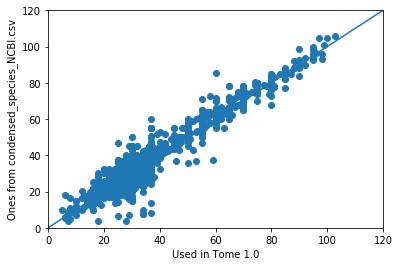

In [21]:
plt.scatter(ogt_old,ogt_new)
lim = (0,120)
plt.plot(lim,lim)
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('Used in Tome 1.0')
plt.ylabel('Ones from condensed_species_NCBI.csv')
plt.show()

#### 3. update ogts with ones from Bowman

In [13]:
dfbowman = pd.read_csv('../data/bowman2017_Table15_1.csv',index_col=0)

In [14]:
dfbowman.head(5)

,Strain,OGT,Accession
Species,,,
Arthrobacter alpinus,R3.8,18,CP012676-7b
Cryobacterium arcticum,PAMC 27867,16,CP016282-4
Cryobacterium flavum,CGMCC 1.11215,9,FNIB00000000
Cryobacterium levicorallinum,GMCC 1.11211,8,FOPW00000000
Cryobacterium luteum,CGMCC 1.11210,10,FOCN00000000


In [15]:
updated_num = 0
new_ones = 0
for ind in dfbowman.index:
    cont = ind.lower().split()
    org = cont[0] + '_' + cont[1]
    if org in df.index:
        if np.isnan(df.loc[org,'ogt']): new_ones += 1
        else: updated_num += 1
        df.loc[org,'ogt'] = dfbowman.loc[ind,'OGT']
print('Number of updated orgs:', updated_num)
print('Number of new ogts:', new_ones)

Number of updated orgs: 108
Number of new ogts: 5


In [16]:
print(len(set(dfmartin.index)))
print(len(dfmartin.index))

14802
14802
